In [1]:
import numpy as np
import mlflow
import matplotlib.pyplot as plt
import numpy as np
from orquestra.sdk.mlflow import get_tracking_token
import os
from orquestra.qml.api import convert_to_torch, BitstringDistribution
import tempfile
import cloudpickle
import torch
import pandas as pd
import seaborn as sns

In [2]:
os.environ["MLFLOW_TRACKING_TOKEN"] = get_tracking_token(config_name="research")
print(os.environ["MLFLOW_TRACKING_TOKEN"])
mlflow.set_tracking_uri(
    "https://research.orquestra.io/mlflow/drug-discovery-dwave-250cee/"
)


# create named temporary directory:
with tempfile.TemporaryDirectory() as tmpdirname:
    run_id = "15a807e5654e4e018982cc4dae9f14b5"
    artifacts = mlflow.artifacts.list_artifacts(run_id=run_id)
    costs = {}
    # results = {}
    parameters = {}
    result_and_model = None
    emissions = None
    for artifact in artifacts:
        filename = artifact.path
        if filename.startswith("result"):
            mlflow.artifacts.download_artifacts(
                run_id=run_id, dst_path=tmpdirname, artifact_path=filename
            )
            # costs[int(filename.split("_")[2])] = cloudpickle.load(open(os.path.join(tmpdirname, filename), "rb"))
            results = cloudpickle.load(open(os.path.join(tmpdirname, filename), "rb"))
            ligands = results[-2]

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJqNFdrOGRhY2daRW4waXFGc1VjSlRuM3A4V1pycVBLV2xVakdPaV9kUnh3In0.eyJleHAiOjE3MjA0NzEwODgsImlhdCI6MTcxOTg2NjI4OCwiYXV0aF90aW1lIjoxNzE5ODY2Mjg4LCJqdGkiOiI0YjFkYTVkNi1lYmQ0LTQyZTctYWQ1Ni03MWYzNDhmNjVlZTEiLCJpc3MiOiJodHRwczovL3Jlc2VhcmNoLm9ycXVlc3RyYS5pby9hdXRoL3JlYWxtcy9wbGF0Zm9ybSIsImF1ZCI6InFlIiwic3ViIjoiMzUzMjI3MDItMDY3OS00NjNmLTgyZjctMTBjN2IyN2Y0ZmQ1IiwidHlwIjoiSUQiLCJhenAiOiJxZSIsInNlc3Npb25fc3RhdGUiOiJhNjFiZjFhZi1lMGY2LTRmOTMtOGU1ZS0yZDg4MzQ2NzJjNzQiLCJhdF9oYXNoIjoiM2pWeU15ell1aXhZUWNVVi1YbDZyZyIsInNpZCI6ImE2MWJmMWFmLWUwZjYtNGY5My04ZTVlLTJkODgzNDY3MmM3NCIsIm5iZiI6MCwiZW1haWxfdmVyaWZpZWQiOnRydWUsInJvbGVzIjpbIlN1cGVyc2V0OkVkaXRvciIsIkdsb2JhbDpFZGl0b3IiLCIwOnN5c3RlbTpyZXNvdXJjZV9ncm91cDpocHQtZGVtby0wNzNjNmEhYWRtaW4iLCJQb3J0YWw6RWRpdG9yIiwiMDpzeXN0ZW06cmVzb3VyY2VfZ3JvdXA6ZWFnbGUtdGVzdC1hMjAyYmMhYWRtaW4iLCJDbG91ZENvc3Q6RWRpdG9yIiwib2ZmbGluZV9hY2Nlc3MiLCIwOnN5c3RlbTpyZXNvdXJjZV9ncm91cDpkcnVnLWRpc2NvdmVyeS1kd2F2ZS0yNTBjZWUhYWRtaW4iLCJ1bWFfYXV0

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
os.environ["MLFLOW_TRACKING_TOKEN"] = get_tracking_token(config_name="research")
print(os.environ["MLFLOW_TRACKING_TOKEN"])
mlflow.set_tracking_uri(
    "https://research.orquestra.io/mlflow/drug-discovery-dwave-250cee/"
)

# Retrieve the experiment by name
experiment_name = "nLSTM_Tartarus_filter_covid"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    print(f"Experiment '{experiment_name}' not found")
else:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID: {experiment_id}")

    # Fetch runs for the experiment

    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    print(runs)  # Print out the DataFrame containing the runs
    # sr_values = []
    # cost_fn_values = []
    # diversity_values = []
    all_runs = {}
    # Load data from runs
    if not runs.empty:
        for run_id in runs["run_id"]:
            run = mlflow.get_run(run_id)
            # print(f"Run ID: {run_id}")
            # print(f"Parameters: {run.data.params}")
            # print(f"Metrics: {run.data.metrics}")
            # print(f"Tags: {run.data.tags}")
            # sr_values.append(run.data.metrics.get("SR"))
            # cost_fn_values.append(run.data.metrics.get("cost_fn"))
            # diversity_values.append(run.data.metrics.get("diversity"))

            all_runs[run_id] = run

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJqNFdrOGRhY2daRW4waXFGc1VjSlRuM3A4V1pycVBLV2xVakdPaV9kUnh3In0.eyJleHAiOjE3MjA0NzEwODgsImlhdCI6MTcxOTg2NjI4OCwiYXV0aF90aW1lIjoxNzE5ODY2Mjg4LCJqdGkiOiI0YjFkYTVkNi1lYmQ0LTQyZTctYWQ1Ni03MWYzNDhmNjVlZTEiLCJpc3MiOiJodHRwczovL3Jlc2VhcmNoLm9ycXVlc3RyYS5pby9hdXRoL3JlYWxtcy9wbGF0Zm9ybSIsImF1ZCI6InFlIiwic3ViIjoiMzUzMjI3MDItMDY3OS00NjNmLTgyZjctMTBjN2IyN2Y0ZmQ1IiwidHlwIjoiSUQiLCJhenAiOiJxZSIsInNlc3Npb25fc3RhdGUiOiJhNjFiZjFhZi1lMGY2LTRmOTMtOGU1ZS0yZDg4MzQ2NzJjNzQiLCJhdF9oYXNoIjoiM2pWeU15ell1aXhZUWNVVi1YbDZyZyIsInNpZCI6ImE2MWJmMWFmLWUwZjYtNGY5My04ZTVlLTJkODgzNDY3MmM3NCIsIm5iZiI6MCwiZW1haWxfdmVyaWZpZWQiOnRydWUsInJvbGVzIjpbIlN1cGVyc2V0OkVkaXRvciIsIkdsb2JhbDpFZGl0b3IiLCIwOnN5c3RlbTpyZXNvdXJjZV9ncm91cDpocHQtZGVtby0wNzNjNmEhYWRtaW4iLCJQb3J0YWw6RWRpdG9yIiwiMDpzeXN0ZW06cmVzb3VyY2VfZ3JvdXA6ZWFnbGUtdGVzdC1hMjAyYmMhYWRtaW4iLCJDbG91ZENvc3Q6RWRpdG9yIiwib2ZmbGluZV9hY2Nlc3MiLCIwOnN5c3RlbTpyZXNvdXJjZV9ncm91cDpkcnVnLWRpc2NvdmVyeS1kd2F2ZS0yNTBjZWUhYWRtaW4iLCJ1bWFfYXV0

In [4]:
pd.DataFrame(all_runs)

,2745e85a6d3e49cba2127732c945cb42,247ba89617c74ff18ff8c37096ce66a9,81f67ce851274cb6845403b47fc0d0df,753267cdd2184511a82679bc25707e7b,5078c9fba5a9436cbfc760cb0099bd14,59e11f002582490f8fbffbc5c0cf000a,7ead499354e142d18b3bf4a30734f2b9,5e0639c41a1f4636ae8675dc7bbdddf3,5fb3ddfefa3f482e83fc3c404dd37caa,b99076c82b8b454fb8752f6136311ebc,...,76d065b5fb71422ca24e85363ef8ce76,fa4f88115ee7422b8fada9a773501123,259b55d4db9a48628329e796abe5950b,64877b0e471943e0bd5f52070439eff9,27fded8bf53e45888fa838419ff43e0c,21a90e6ed7da4bab83ba779082d8a93e,f442a1a1b336431889f538f19c851b0b,f73a653812454855a96dc4f5d25f8105,f281535cb42648db940ddb267237d968,15a807e5654e4e018982cc4dae9f14b5
0,"(data, <RunData: metrics={'SR': 40.38,\n 'cost...","(data, <RunData: metrics={'SR': 29.16,\n 'cost...","(data, <RunData: metrics={'SR': 42.64,\n 'cost...","(data, <RunData: metrics={'SR': 41.1,\n 'cost_...","(data, <RunData: metrics={'SR': 27.46,\n 'cost...","(data, <RunData: metrics={'SR': 38.56,\n 'cost...","(data, <RunData: metrics={'SR': 37.72,\n 'cost...","(data, <RunData: metrics={'SR': 30.04,\n 'cost...","(data, <RunData: metrics={'SR': 28.54,\n 'cost...","(data, <RunData: metrics={'SR': 28.88,\n 'cost...",...,"(data, <RunData: metrics={'SR': 2.94,\n 'cost_...","(data, <RunData: metrics={'SR': 26.9,\n 'cost_...","(data, <RunData: metrics={'SR': 3.08,\n 'cost_...","(data, <RunData: metrics={'SR': 2.68,\n 'cost_...","(data, <RunData: metrics={'SR': 3.42,\n 'cost_...","(data, <RunData: metrics={'SR': 3.56,\n 'cost_...","(data, <RunData: metrics={'SR': 4.04,\n 'cost_...","(data, <RunData: metrics={'SR': 4.84,\n 'cost_...","(data, <RunData: metrics={'SR': 2.92,\n 'cost_...","(data, <RunData: metrics={'SR': 3.4,\n 'cost_f..."
1,"(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...",...,"(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact...","(info, <RunInfo: artifact_uri='mlflow-artifact..."
2,"(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)",...,"(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)","(inputs, <RunInputs: dataset_inputs=[]>)"


random_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_add
random_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_multi
rbm_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_multi
rbm_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_add


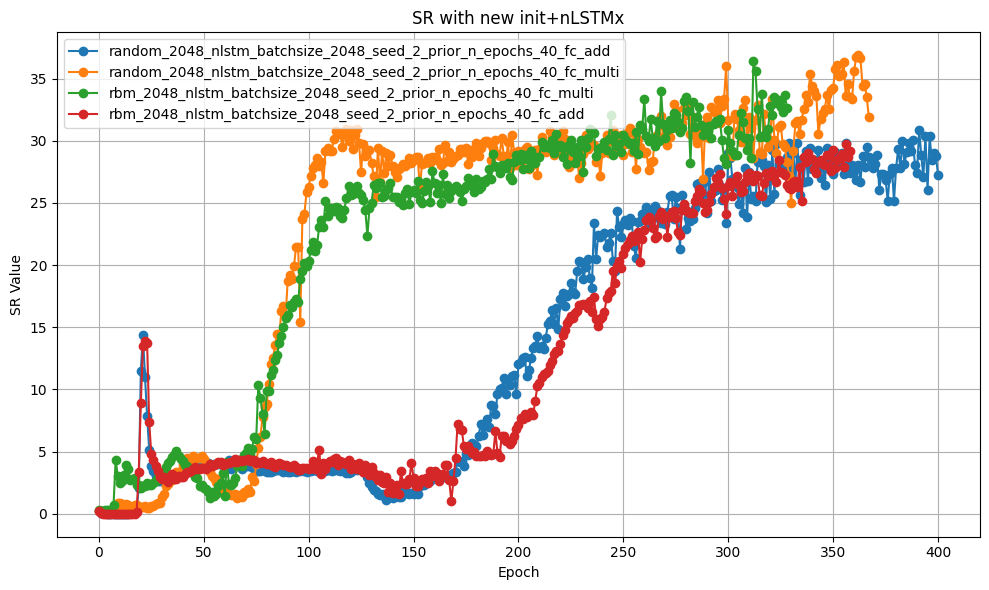

In [51]:
runs = [
    "5078c9fba5a9436cbfc760cb0099bd14",
    "59e11f002582490f8fbffbc5c0cf000a",
    "7ead499354e142d18b3bf4a30734f2b9",
    "5e0639c41a1f4636ae8675dc7bbdddf3",
]
client = mlflow.tracking.MlflowClient()
plt.figure(figsize=(10, 6))
for run_id in runs:
    print(all_runs[run_id].data.tags["mlflow.runName"])

    # plt.subplot(1, 3, 1)
    metric_history = client.get_metric_history(run_id, "SR")
    metrics_data = []
    for point in metric_history:
        metrics_data.append(point.value)
    plt.plot(
        metrics_data, marker="o", label=all_runs[run_id].data.tags["mlflow.runName"]
    )

    plt.xlabel("Epoch")
    plt.ylabel("SR Value")

plt.title("SR with new init+nLSTMx")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

random_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40


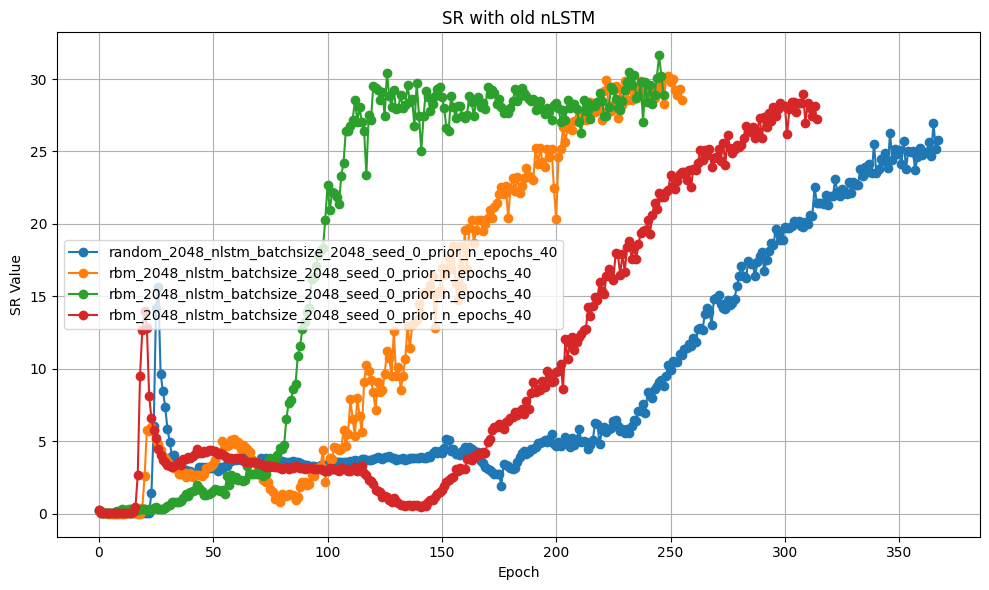

In [20]:
runs = [
    "9d45f1c61959484cb45264014a5cad0a",
    "5fb3ddfefa3f482e83fc3c404dd37caa",
    "b99076c82b8b454fb8752f6136311ebc",
    "a5a561c160d645f292ac811574e1e959",
]
client = mlflow.tracking.MlflowClient()
plt.figure(figsize=(10, 6))
for run_id in runs:
    print(all_runs[run_id].data.tags["mlflow.runName"])

    # plt.subplot(1, 3, 1)
    metric_history = client.get_metric_history(run_id, "SR")
    metrics_data = []
    for point in metric_history:
        metrics_data.append(point.value)
    plt.plot(
        metrics_data, marker="o", label=all_runs[run_id].data.tags["mlflow.runName"]
    )

    plt.xlabel("Epoch")
    plt.ylabel("SR Value")

plt.title("SR with old nLSTM")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [5]:
client = mlflow.tracking.MlflowClient()
all_sizes = {"random": {}, "rbm": {}}
for run_id in all_runs.keys():
    print(all_runs[run_id].data.tags["mlflow.runName"])
    name = all_runs[run_id].data.tags["mlflow.runName"]
    name_id = name.split("_")
    metric_history = client.get_metric_history(run_id, "SR")
    metrics_data = []
    for point in metric_history:
        metrics_data.append(point.value)
    all_sizes[name_id[0]][int(name_id[1])] = metrics_data

    # plt.plot(
    #     metrics_data, marker="o", label=all_runs[run_id].data.tags["mlflow.runName"]
    # )

random_2048_nlstm_batchsize_2048_seed_3_prior_n_epochs_40_fc_add
rbm_2048_nlstm_batchsize_2048_seed_3_prior_n_epochs_40_fc_add
random_2048_nlstm_batchsize_2048_seed_3_prior_n_epochs_40_fc_multi
rbm_2048_nlstm_batchsize_2048_seed_3_prior_n_epochs_40_fc_multi
random_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_add
random_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_multi
rbm_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_multi
rbm_2048_nlstm_batchsize_2048_seed_2_prior_n_epochs_40_fc_add
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
random_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
random_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_20
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_20
rbm_2048_nlstm_batchsize_2048_seed_0_p

rbm_32_nlstm_batchsize_4096
rbm_64_nlstm_batchsize_4096
random_32_nlstm_batchsize_4096
random_64_nlstm_batchsize_4096
rbm_128_nlstm_batchsize_4096
random_128_nlstm_batchsize_4096
rbm_256_nlstm_batchsize_4096
random_256_nlstm_batchsize_4096
rbm_512_nlstm_batchsize_4096
random_512_nlstm_batchsize_4096
rbm_512_nlstm_batchsize_4096_seed_0
random_512_nlstm_batchsize_4096_seed_0
rbm_1024_nlstm_batchsize_4096_seed_0
random_1024_nlstm_batchsize_4096_seed_0
random_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40
rbm_2048_nlstm_batchsize_2048_seed_0_prior_n_epochs_40


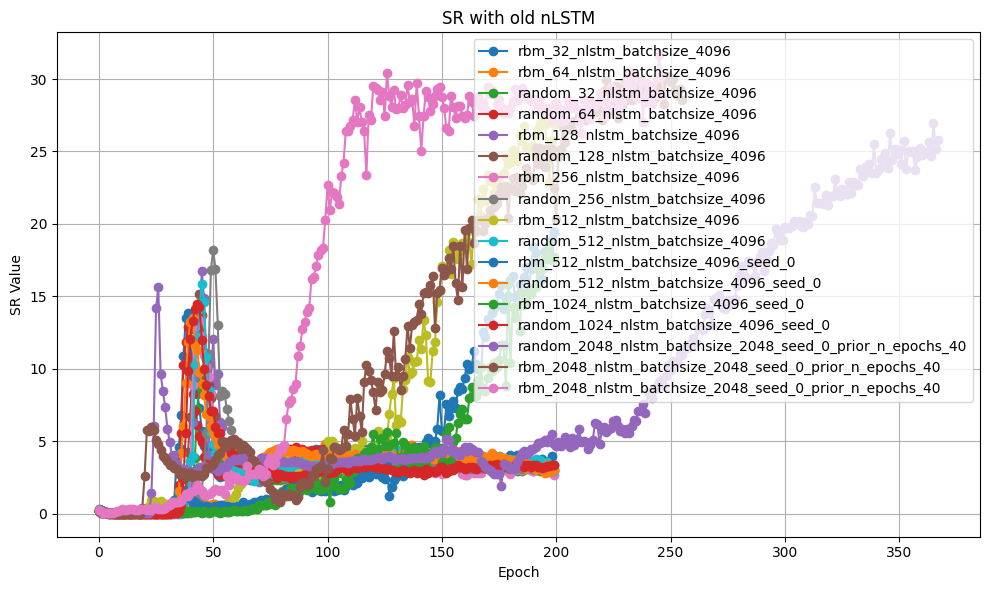

In [24]:
runs = [
    "15a807e5654e4e018982cc4dae9f14b5",
    "f73a653812454855a96dc4f5d25f8105",
    "f281535cb42648db940ddb267237d968",
    "f442a1a1b336431889f538f19c851b0b",
    "21a90e6ed7da4bab83ba779082d8a93e",
    "27fded8bf53e45888fa838419ff43e0c",
    "64877b0e471943e0bd5f52070439eff9",
    "259b55d4db9a48628329e796abe5950b",
    "fa4f88115ee7422b8fada9a773501123",
    "76d065b5fb71422ca24e85363ef8ce76",
    "8fde73c74c1d47a292595d7765f3ae3f",
    "402d185f46094e848d153d3e7d59dfaa",
    "e8e2ff6b189d492f91932b4d463b3a67",
    "098fd1b4853943ae8d111dec5155d46d",
    "9d45f1c61959484cb45264014a5cad0a",
    "5fb3ddfefa3f482e83fc3c404dd37caa",
    "b99076c82b8b454fb8752f6136311ebc",
    # "a5a561c160d645f292ac811574e1e959",
]
client = mlflow.tracking.MlflowClient()
all_data = {}
plt.figure(figsize=(10, 6))
for run_id in runs:
    print(all_runs[run_id].data.tags["mlflow.runName"])

    # plt.subplot(1, 3, 1)
    metric_history = client.get_metric_history(run_id, "SR")
    metrics_data = []
    for point in metric_history:
        metrics_data.append(point.value)
    plt.plot(
        metrics_data, marker="o", label=all_runs[run_id].data.tags["mlflow.runName"]
    )
    all_data[all_runs[run_id].data.tags["mlflow.runName"]] = metrics_data

    plt.xlabel("Epoch")
    plt.ylabel("SR Value")

plt.title("SR with old nLSTM")
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [63]:
random = {}
rbm = {}
for key, data in all_data.items():
    # plt.bar(key,max(data[:300]))

    if key.split("_")[0] == "random":
        random[key.split("_")[1]] = max(data[:300])
    elif key.split("_")[0] == "rbm":
        rbm[key.split("_")[1]] = max(data[:300])
rbm, random

({'32': 13.86,
  '64': 4.84,
  '128': 16.74,
  '256': 13.38,
  '512': 19.46,
  '1024': 18.52,
  '2048': 31.64},
 {'32': 10.7,
  '64': 12.88,
  '128': 15.2,
  '256': 18.22,
  '512': 13.48,
  '1024': 14.48,
  '2048': 19.62})

In [85]:
sns.set()

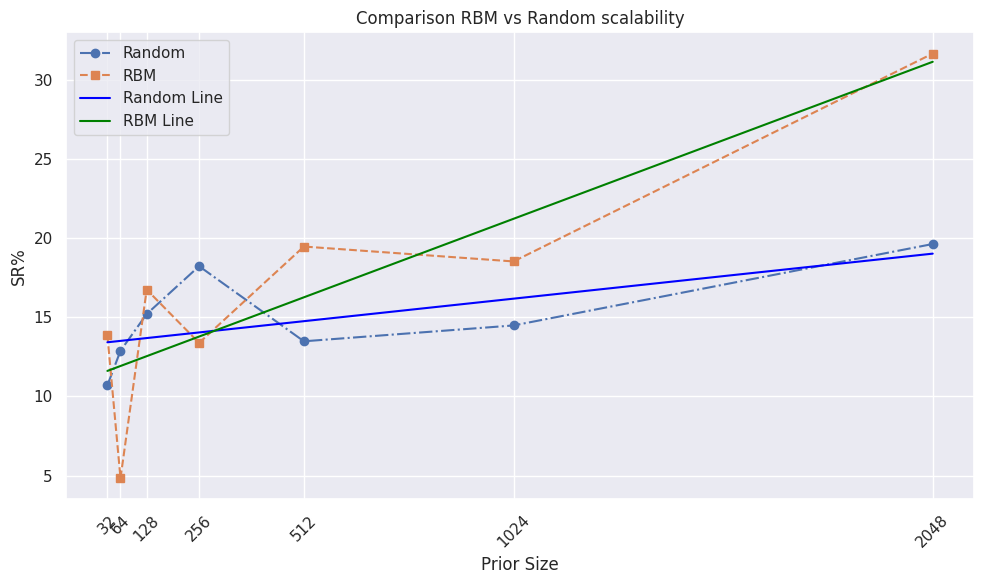

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Extract keys and values
keys = np.array(list(map(int, random.keys()))).reshape(-1, 1)
values1 = np.array(list(random.values()))
values2 = np.array(list(rbm.values()))


# # Extract keys and values
# keys = np.array(list(map(int, data1.keys()))).reshape(-1, 1)
# values1 = np.array(list(data1.values()))
# values2 = np.array(list(data2.values()))

# Perform linear regression
model1 = LinearRegression().fit(keys, values1)
model2 = LinearRegression().fit(keys, values2)

# Predict values
line1 = model1.predict(keys)
line2 = model2.predict(keys)
keys_ = [32, 64, 128, 256, 512, 2048]
# Plot
plt.figure(figsize=(10, 6))
plt.plot(keys, values1, marker="o", linestyle="-.", label="Random")
plt.plot(keys, values2, marker="s", linestyle="--", label="RBM")
plt.plot(keys, line1, color="blue", label="Random Line")
plt.plot(keys, line2, color="green", label="RBM Line")

# Plot
# plt.figure(figsize=(10, 6))
# plt.plot(keys, values1, marker='o', label='Random')
# plt.plot(keys, values2, marker='s', label='RBM')


# Adding labels and title
plt.xlabel("Prior Size")
plt.ylabel("SR%")
plt.title("Comparison RBM vs Random scalability (ADDxy)")
plt.legend()
plt.xticks(keys.flatten(), labels=keys.flatten(), rotation=45)
# plt.grid()

# Show plot
plt.tight_layout()
plt.savefig("rbm_random.png")
plt.show()

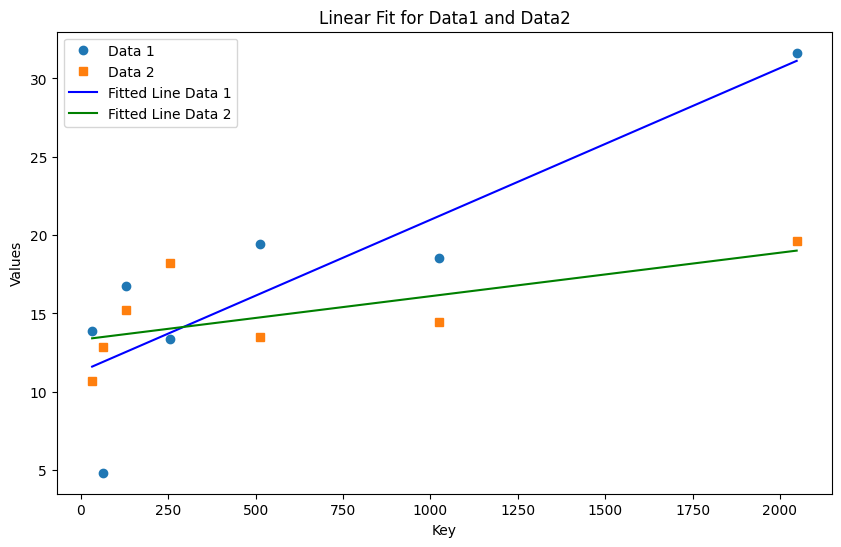

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
data1 = {
    "32": 13.86,
    "64": 4.84,
    "128": 16.74,
    "256": 13.38,
    "512": 19.46,
    "1024": 18.52,
    "2048": 31.64,
}
data2 = {
    "32": 10.7,
    "64": 12.88,
    "128": 15.2,
    "256": 18.22,
    "512": 13.48,
    "1024": 14.48,
    "2048": 19.62,
}

# Extract keys and values
keys = np.array(list(map(int, data1.keys()))).reshape(-1, 1)
values1 = np.array(list(data1.values()))
values2 = np.array(list(data2.values()))

# Perform linear regression
model1 = LinearRegression().fit(keys, values1)
model2 = LinearRegression().fit(keys, values2)

# Predict values
line1 = model1.predict(keys)
line2 = model2.predict(keys)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(keys, values1, marker="o", linestyle="", label="Data 1")
plt.plot(keys, values2, marker="s", linestyle="", label="Data 2")
plt.plot(keys, line1, color="blue", label="Fitted Line Data 1")
plt.plot(keys, line2, color="green", label="Fitted Line Data 2")

# Adding labels and title
plt.xlabel("Key")
plt.ylabel("Values")
plt.title("Linear Fit for Data1 and Data2")
plt.legend()

# Show plot
plt.show()